In [2]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [3]:
N = 50                                
x_start, x_end = -2.0, 2.0            
y_start, y_end = -1.0, 1.0            
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)   

In [4]:
gamma = 5.0 
y_vortex=0.0
a=0.5
NVortex=100
x_vortex = numpy.linspace((-NVortex/2)*a,(NVortex/2)*a,NVortex)

In [5]:
u=v=psi=numpy.zeros((N,N), dtype=float)

In [8]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

In [9]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [17]:
for i in range(0, NVortex):
    u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex[i], y_vortex, X, Y)

    psi_vortex = get_stream_function_vortex(gamma, x_vortex[i], y_vortex, X, Y)
    
    u=u+u_vortex
    v=v+v_vortex
    psi=psi+psi_vortex

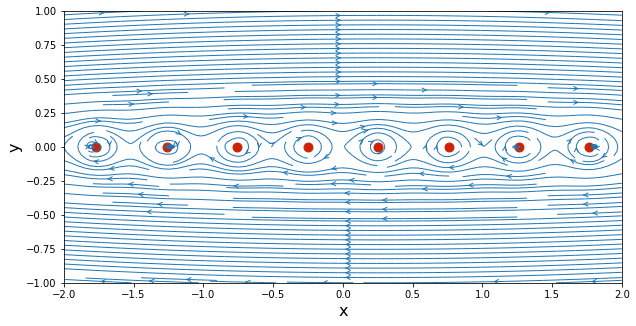

In [19]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex,numpy.zeros(x_vortex.size,), color='#CD2305', s=80, marker='o');